<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<br><br><br>

<h1> Regression Analysis  </h1><br>
<b> Machine Learning</b><br>
Émilie Lopez<br>
Hult International Business School <br>
<br><br><br><br><br>

<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<hr style="height:1px;border:none;color:#333;background-color:#333;" />
<br>

<h1> PART I: INITIAL EXPLORATION OF THE DATASET </h1>
<br>
<h3>IMPORTING LIBRARIES</h3>

In [1]:
# Importing libraries

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ARDRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

<br>
<h3>IMPORTING DATASET TO PYTHON NOTEBOOK</h3>

In [2]:
# Loading Apprentice Chef dataset
file = "./Apprentice_Chef_Dataset.xlsx"
apprentice = pd.read_excel(io = file)

<br>
<h3> OBSERVING THE DATA </h3>

In [3]:
# Looking at the first five rows of the dataset
apprentice.head(n = 5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,...,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,...,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,...,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,...,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,...,0,8,0,0,84.8,1,1,3,12,205


In [4]:
# Printing the number of observations and features
print(f"""
Size of Original Dataset
------------------------
Observations: {apprentice.shape[0]}
Features:     {apprentice.shape[1]}
""")


## There are 1946 observations and 28 features


Size of Original Dataset
------------------------
Observations: 1946
Features:     28



In [5]:
# Checking if the dataset has missing value
apprentice.isnull().sum(axis=0)


## There are no missing values expect for the feature family name. Family
## names are objects and therefore will not be included in the model.

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    47
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

In [6]:
# Looking at the data type
print(apprentice.info())


## Some features are object and should not be included in our model. Some 
## features are categorical and can be transformed with feature engineering.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 13  CANCELLATIONS_AFTE

<br>
<h3> IDENTIFY DATA TYPE FOR EACH VARIABLE </h3>

<br>
<h3> LOOKING AT DESCRIPTIVE STATISTICS FOR NUMERIC DATA </h3>

In [7]:
# Looking at descriptive statistics for numeric data
apprentice.describe(include = 'number').round(decimals = 2)

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,...,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,...,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,...,1.49,2.97,0.36,0.11,150.56,4.44,0.60,2.79,13.51,106.43
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,...,2.32,2.74,0.48,0.32,49.45,1.55,0.64,0.76,2.33,181.01
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,33.40,1.00,0.00,1.00,5.00,0.00
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,...,0.00,1.00,0.00,0.00,114.40,3.00,0.00,2.00,12.00,0.00
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,...,0.00,2.00,0.00,0.00,145.60,4.00,1.00,3.00,13.00,0.00
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,...,3.00,4.00,1.00,0.00,173.78,5.00,1.00,3.00,15.00,174.00
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,...,9.00,19.00,1.00,1.00,564.20,11.00,3.00,5.00,19.00,1600.00


<br>
<h1> PART II: FEATURE ENGINEERING </h1>
<br>

<h2> 1. CONTINUOUS DATA </h2>
<h3> CREATING A LOGARITHMIC FEATURE FOR REVENUE </h3>

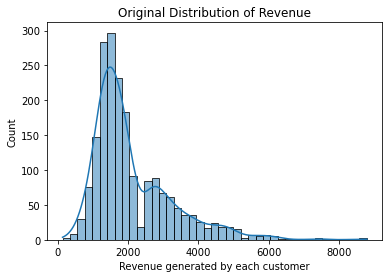

In [8]:
# Developing a histogram for REVENUE
sns.histplot(data = apprentice, x = "REVENUE", kde = True)

# Adding a title and axis labels
plt.title(label = "Original Distribution of Revenue")
plt.xlabel(xlabel = "Revenue generated by each customer")
plt.ylabel(ylabel = "Count")

# Displaying the histogram
plt.show()


## The distribution of revenue is skewed to the left.

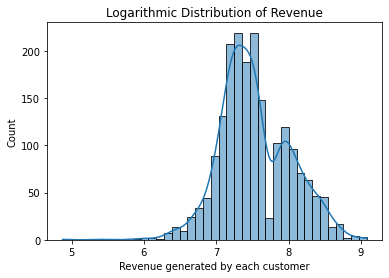

In [9]:
# Log transforming REVENUE 
apprentice['log_revenue'] = np.log(apprentice['REVENUE'])

# Developing a histogram for log_revenue
sns.histplot(data = apprentice, x = "log_revenue", kde = True)

# Adding a title and axis labels
plt.title(label = "Logarithmic Distribution of Revenue")
plt.xlabel(xlabel = "Revenue generated by each customer")
plt.ylabel(ylabel = "Count")

# Displaying the histogram
plt.show()


## The distribution is improved

<h3> CREATING A LOGARITHMIC FEATURE FOR AVG_TIME_PER_VISIT </h3>

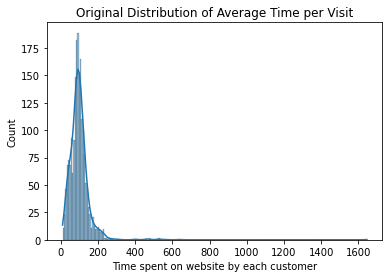

In [10]:
# Developing a histogram for AVG_TIME_PER_SITE_VISIT
sns.histplot(data = apprentice, x = "AVG_TIME_PER_SITE_VISIT", kde = True)

# Adding a title and axis labels
plt.title(label = "Original Distribution of Average Time per Visit")
plt.xlabel(xlabel = "Time spent on website by each customer")
plt.ylabel(ylabel = "Count")

# Displaying the histogram
plt.show()


## The distribution of revenue is highly skewed to the left.

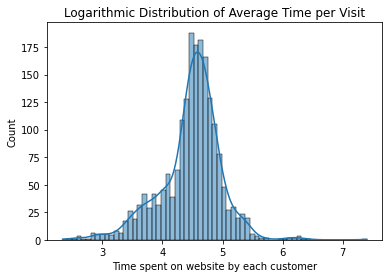

In [11]:
# Log transforming AVG_TIME_PER_VISIT 
apprentice['log_avg_time'] = np.log(apprentice['AVG_TIME_PER_SITE_VISIT'])

# Developing a histogram for log_avg_time
sns.histplot(data = apprentice, x = "log_avg_time", kde = True)

# Adding a title and axis labels
plt.title(label = "Logarithmic Distribution of Average Time per Visit")
plt.xlabel(xlabel = "Time spent on website by each customer")
plt.ylabel(ylabel = "Count")

# Displaying the histogram
plt.show()


## The distribution is improved

<h3> CREATING A LOGARITHMIC FEATURE FOR AVG_PREP_VID_TIME </h3>

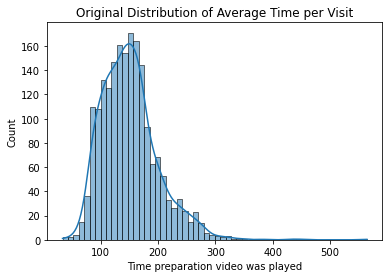

In [12]:
# Developing a histogram for AVG_PREP_VID_TIME
sns.histplot(data = apprentice, x = "AVG_PREP_VID_TIME", kde = True)

# Adding a title and axis labels
plt.title(label = "Original Distribution of Average Time per Visit")
plt.xlabel(xlabel = "Time preparation video was played")
plt.ylabel(ylabel = "Count")

# Displaying the histogram
plt.show()


## The distribution of revenue is skewed to the left.

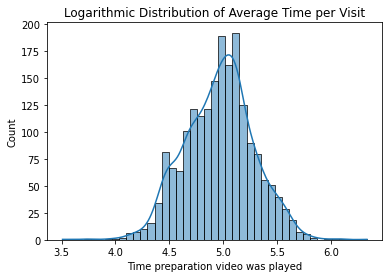

In [13]:
# Log transforming AVG_PREP_VID_TIME
apprentice['log_prep_vid'] = np.log(apprentice['AVG_PREP_VID_TIME'])

# Developing a histogram for log_prep_vid
sns.histplot(data = apprentice, x = "log_prep_vid", kde = True)

# Adding a title and axis labels
plt.title(label = "Logarithmic Distribution of Average Time per Visit")
plt.xlabel(xlabel = "Time preparation video was played")
plt.ylabel(ylabel = "Count")

# Displaying the histogram
plt.show()


## The distribution is improved.

<h2> 2. COUNT AND INTERVAL DATA </h2>
<h3> TOTAL_MEALS_ORDERED </h3>

In [14]:
# Descriptive statisctics for TOTAL_MEALS_ORDERED
apprentice['TOTAL_MEALS_ORDERED'].describe(include = 'number').round(decimals = 2)

count    1946.00
mean       74.63
std        55.31
min        11.00
25%        39.00
50%        60.00
75%        95.00
max       493.00
Name: TOTAL_MEALS_ORDERED, dtype: float64

In [15]:
# Placeholder variables using percentiles
apprentice['small_customer'] = 0
apprentice['medium_customer'] = 0
apprentice['large_customer'] = 0

# Creating a loop to fill
for index, row in apprentice.iterrows():
    
    # small_customer
    if apprentice.loc[index, 'TOTAL_MEALS_ORDERED'] < 39 :
        apprentice.loc[index, 'small_customer'] = 1   
     
    # medium_customer
    elif apprentice.loc[index, 'TOTAL_MEALS_ORDERED'] >= 40 and apprentice.loc[index, 'TOTAL_MEALS_ORDERED'] < 95:
        apprentice.loc[index, 'medium_customer'] = 1
    
    # large_customer
    if apprentice.loc[index, 'TOTAL_MEALS_ORDERED'] >= 95 :
        apprentice.loc[index, 'large_customer'] = 1

In [16]:
# Log transforming TOTAL_MEALS_ORDERED
apprentice['log_total_meal_ordered'] = np.log(apprentice['TOTAL_MEALS_ORDERED'])

<h3> UNIQUE_MEALS_PURCH </h3>

In [17]:
# Creating a feature measuring the number of unique meal set purchased compared to the total number purchased
apprentice['ratio_unique'] = apprentice['UNIQUE_MEALS_PURCH']/apprentice['TOTAL_MEALS_ORDERED']

<h3> CONTACTS_W_CUSTOMER_SERVICE </h3>

In [18]:
# Descriptive statisctics for CONTACTS_W_CUSTOMER_SERVICE
apprentice['CONTACTS_W_CUSTOMER_SERVICE'].describe(include = 'number').round(decimals = 2)

count    1946.00
mean        6.98
std         2.28
min         1.00
25%         5.00
50%         7.00
75%         8.00
max        18.00
Name: CONTACTS_W_CUSTOMER_SERVICE, dtype: float64

In [19]:
# Placeholder variables using percentiles
apprentice['low_contact'] = 0
apprentice['medium_contact'] = 0
apprentice['large_contact'] = 0

# Creating a loop to fill
for index, row in apprentice.iterrows():
    
    # low_contact
    if apprentice.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] < 5 :
        apprentice.loc[index, 'low_contact'] = 1   
     
    # medium_contact
    elif apprentice.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] >= 5 and apprentice.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] < 8:
        apprentice.loc[index, 'medium_contact'] = 1
    
    # large_contact
    if apprentice.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] >= 8 :
        apprentice.loc[index, 'large_contact'] = 1

<h3> PRODUCT_CATEGORIES_VIEWED </h3>

In [20]:
# Creating a feature with the number of meal set purchased compared to the average number of set per order
apprentice['category_nb_meal'] = apprentice['LARGEST_ORDER_SIZE']/apprentice['PRODUCT_CATEGORIES_VIEWED']

<h3> AVG_CLICKS_PER_VISIT </h3>

In [21]:
# Descriptive statisctics for LARGEST_ORDER_SIZE
apprentice['AVG_CLICKS_PER_VISIT'].describe(include = 'number').round(decimals = 2)

count    1946.00
mean       13.51
std         2.33
min         5.00
25%        12.00
50%        13.00
75%        15.00
max        19.00
Name: AVG_CLICKS_PER_VISIT, dtype: float64

In [22]:
# Log transforming LARGEST_ORDER_SIZE
apprentice['log_avg_clicks_per_visit'] = np.log(apprentice['AVG_CLICKS_PER_VISIT'])

<h3> MEDIAN_MEAL_RATING </h3>

In [23]:
apprentice['MEDIAN_MEAL_RATING'].describe(include = 'number').round(decimals = 2)

count    1946.00
mean        2.79
std         0.76
min         1.00
25%         2.00
50%         3.00
75%         3.00
max         5.00
Name: MEDIAN_MEAL_RATING, dtype: float64

In [24]:
# Placeholder variables using percentiles
apprentice['low_ranking'] = 0
apprentice['medium_ranking'] = 0
apprentice['high_ranking'] = 0

# Creating a loop to fill
for index, row in apprentice.iterrows():
    
    # low_contact
    if apprentice.loc[index, 'MEDIAN_MEAL_RATING'] < 3:
        apprentice.loc[index, 'low_ranking'] = 1   
     
    # medium_contact
    elif apprentice.loc[index, 'MEDIAN_MEAL_RATING'] == 3:
        apprentice.loc[index, 'medium_ranking'] = 1
    
    # large_contact
    if apprentice.loc[index, 'MEDIAN_MEAL_RATING'] > 3 :
        apprentice.loc[index, 'high_ranking'] = 1

<h3> TOTAL_PHOTOS_VIEWED </h3>

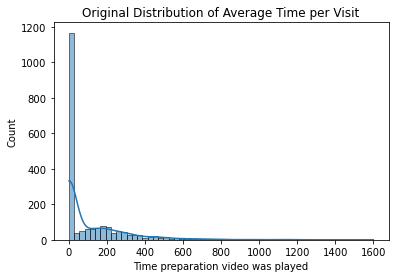

In [25]:
# Developing a histogram for AVG_PREP_VID_TIME
sns.histplot(data = apprentice, x = "TOTAL_PHOTOS_VIEWED", kde = True)

# Adding a title and axis labels
plt.title(label = "Original Distribution of Average Time per Visit")
plt.xlabel(xlabel = "Time preparation video was played")
plt.ylabel(ylabel = "Count")

# Displaying the histogram
plt.show()

In [26]:
# Placeholder variables using percentiles
apprentice['viewed_photo'] = 0

# Creating a loop to fill
for index, row in apprentice.iterrows():
    
    # small_customer
    if apprentice.loc[index, 'TOTAL_PHOTOS_VIEWED'] == 0 :
        apprentice.loc[index, 'viewed_photo'] = 0   
     
    # medium_customer
    elif apprentice.loc[index, 'TOTAL_PHOTOS_VIEWED'] >= 1:
        apprentice.loc[index, 'viewed_photo'] = 1
    

<br>
<h2> PART 3: BUILDING A MODEL </h2>

<br>
<h3> SPLITTING DATA INTO TRAINING AND TESTING </h3>

In [27]:
# Creating a model with all numeric variables

# Creating features and target variable
X = apprentice.loc[:,['CROSS_SELL_SUCCESS','UNIQUE_MEALS_PURCH','CONTACTS_W_CUSTOMER_SERVICE','PRODUCT_CATEGORIES_VIEWED','MOBILE_NUMBER','CANCELLATIONS_BEFORE_NOON','CANCELLATIONS_AFTER_NOON','TASTES_AND_PREFERENCES','PC_LOGINS','MOBILE_LOGINS','WEEKLY_PLAN','EARLY_DELIVERIES','LATE_DELIVERIES','PACKAGE_LOCKER','REFRIGERATED_LOCKER','LARGEST_ORDER_SIZE','MASTER_CLASSES_ATTENDED','MEDIAN_MEAL_RATING','TOTAL_PHOTOS_VIEWED','log_avg_time','log_prep_vid','small_customer','medium_customer','large_customer','log_total_meal_ordered','ratio_unique','low_contact','medium_contact','large_contact','category_nb_meal','log_avg_clicks_per_visit','low_ranking','medium_ranking','high_ranking','viewed_photo']]
y = apprentice.loc[:,['log_revenue']]

# Splitting the data in training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 219, test_size = 0.25)

<h3> LINEAR REGRESSION </h3>

In [28]:
# Creating the linear regression object
lr = LinearRegression()

# Fitting the regression model to the training data
lr_fit = lr.fit(X_train, y_train)

# Predicting on the test data
lr_prediction = lr_fit.predict(X_test)

# Creating score variables for training and testing
lr_training_score = lr.score(X_train, y_train).round(4)
lr_testing_score = lr.score(X_test, y_test).round(4)

<h3> LASSO REGRESSION </h3>

In [29]:
# Creating the lasso model object
lasso = Lasso()

# Fitting the regression model to the training data
lasso_fit = lasso.fit(X_train, y_train)

# Predicting on the test data
lasso_pred = lasso_fit.predict(X_test)

# Creating score variables for training and testing
lasso_training_score = lasso.score(X_train, y_train).round(4)
lasso_testing_score = lasso.score(X_test, y_test).round(4)

<h3> ARD REGRESSION </h3>

In [30]:
# Creating the ard regression object
ard_model = ARDRegression(normalize  = False)

# Fitting the regression model to the training data
ard_fit = ard_model.fit(X_train, y_train)

# Predicting on the test data
ard_pred = ard_fit.predict(X_test)

# Creating score variables for training and testing
ard_training_score = ard_model.score(X_train, y_train).round(4)
ard_testing_score = ard_model.score(X_test, y_test).round(4)

/Users/emilie/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/emilie/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<h3> KNN REGRESSION </h3>

In [31]:
# Creating the knn regression object
knn_reg = KNeighborsRegressor()

# Fitting the regression model to the training data
knn_fit = knn_reg.fit(X_train, y_train)

# Predicting on the test data
knn_reg_pred = knn_fit.predict(X_test)

# Creating score variables for training and testing
knn_training_score =  knn_reg.score(X_train, y_train).round(4)
knn_testing_score =  knn_reg.score(X_test, y_test).round(4)

<h3> SUMMARY REGRESSION SCORE </h3>

In [32]:
print(f"""
Model      Train Score      Test Score      Train-Test Gap
-----      -----------      ----------      --------------
LR            {lr_training_score}          {lr_testing_score}            {(lr_training_score-lr_testing_score).round(4)}
Lasso         {lasso_training_score}           {lasso_testing_score}            {(lasso_training_score-lasso_testing_score).round(4)}  
ARD           {ard_training_score}          {ard_testing_score}           {(ard_training_score-ard_testing_score).round(4)}  
KNN           {knn_training_score}          {knn_testing_score}             {(knn_training_score-knn_testing_score).round(4)}  
""")


## The model with the best test score and the the smallest train-test gap
## is the Linear model. Therefore, this is the one that should be selected



Model      Train Score      Test Score      Train-Test Gap
-----      -----------      ----------      --------------
LR            0.7354          0.7319            0.0035
Lasso         0.186           0.1841            0.0019  
ARD           0.7298          0.7306           -0.0008  
KNN           0.5808          0.365             0.2158  



<br>
<h2> --> BEST MODELS: LINEAR REGRESSION AND ARD </h2>